Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `LAB_SECTION` below:

In [2]:
NAME = "Zaynul Abedin Miah"
ID = "22341034"
SECTION = "05"

---

# Part 1: Representing a Polynomial

Polynomials are function of the following format

$$p(x) = a_0 + a_1 x ^ 1 + a_2 x ^ 2 + ... + a_n x ^ n,$$

where, $[a_0, a_1, \cdots a_n]$ are called coefficients and $n$ (called the degree or order) is a non-negative integer.


This can also be written as:

$$y = f(x) = a_0 x^0 + a_1 x ^ 1 + a_2 x ^ 2 + ... + a_n x ^ n.$$

**Example**
$$ y = 1 + 2x^2 + 5x^4 $$ is a polynomial of order 4 ($ = n$) with $n+1$ coeffecients $a_0 = 1, a_1 = 0, a_2 = 2, a_3 = 0, a_4 = 5$

## **Method 1**: Using List - 1 Marks

---

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# numpy is used for efficient array (vector or matrix) operations
# pyplot is used for plotting
# Must read: [https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm]

In [4]:
coeff = [1, 0, 2, 0, 5] # coefficients of the polynomial
n = len(coeff) - 1 # degree. Remember: number of coeff = degree + 1

'''
For a single value of x, finding p(x)

Note that this is an example of block comment in python. A block comment
starts with three ' and ends with three '.
'''

x = 6.0
p_x = 0.0
for i in range(n+1):
    p_x+=coeff[i]*x**i
print(p_x)

x_arr = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
p_x_arr = []
for i in x_arr:
    p_x=0
    for j in range(n+1):
        p_x+=coeff[j]*(i**j)
    p_x_arr.append(p_x)
print(p_x_arr)

#Your code HERE

6553.0
[8.0, 89.0, 424.0, 1313.0, 3176.0, 6553.0]


## **Method 2 (Better)**: Using a Class - 1.5 Marks

---
Complete the implementation of the polynomial class as showed in the lecture

In [5]:
'''
Lab task 1
Here we implement a Polynomial class with three methods: the constructor
__init__(), the toString method __repr__(), and a method to make the objects
of the class callable, __call__() method
'''

# Polynomial Class

class Polynomial:
  # Constructor, note that it starts and ends with two underscores
  def __init__(self, coeff):
    '''
    Every internal variable of the object must be saved and initialized
    in this method: self.variable = value
    '''
    self.coeff = coeff
    self.degree = len(coeff) - 1

  # Constructor to make the object callable
  def __call__(self, x_arr):
    '''
    Here we assumed x_arr is a numpy array. Remember that a numpy array acts
    like a vector (1D matrix). So an operation x + 1 would add 1 to each element
    of the matrix (unlike python's defaule list). Simlarly, x ** 2 would return
    element wise square of the array.

    Hence, this method would return an array, where the i'th element is the
    (polynomial) interpolated value of x[i], given the coeffecients a[i].
    '''
    p_x_arr = []
    # --------------------------------------------
    # HINT: Should look like
    # for i in range(self.degree + 1):
    #     ????
    # --------------------------------------------

    # remember 1: length = degree + 1 for a polynomial
    # remember 2: range(0, a) is same as range(a)
    # remember 3: range(a, b) means a is inclusive, b is exclusive

    # --------------------------------------------
    # YOUR CODE HERE
    for i in x_arr:
        p_x=0
        for j in range(self.degree+1):
            p_x+=self.coeff[j]*(i**j)
        p_x_arr.append(p_x)
    # --------------------------------------------
    return np.array(p_x_arr)
  # String representation method of the object (similar to toString() of java)
  def __repr__(self):
    # remember: a formatted string must start with f.

    str_ret = f'Polynomial of degree {self.degree}\np(x) = '
    for i in range(self.degree + 1):
        a_val = self.coeff[i]
        if i != 0:
            if a_val >= 0:
                str_ret += f'+ {a_val}x^{i} '
            else:
                str_ret += f'- {-a_val}x^{i} '
        else:
            str_ret += f'{a_val}x^{i} '

    return str_ret

  # custom method 1: to get the degree of the polynomial
  def get_degree(self):
    # --------------------------------------------
    return self.degree
    # --------------------------------------------

  # custom method 2: to get the coefficients of the polynomial
  def get_coeffs(self):
    # --------------------------------------------
    return self.coeff
    # --------------------------------------------

In [6]:
# test cases for your answer
x_arr = np.array([1, 2, 3, 4, 5])

coeff = np.array([1.0, 0.0, 2.0, 0.0, 5.0])
p = Polynomial(coeff)

results = [8, 89, 424, 1313, 3176]
test = p(x_arr)

np.testing.assert_array_equal(results, test)

In [7]:
# an example to see if our implementation works
coeff = np.array([1.0, 0.0, 2.0, 0.0, 5.0])
p = Polynomial(coeff)
print(p)  # check if printable
x_arr = np.array([1, 2, 3, 4, 5])
print()
print(f"p({x_arr}) =", p(x_arr)) # check if the object is callable
# should print p([1 2 3 4 5]) =  [   8.   89.  424. 1313. 3176.]

Polynomial of degree 4
p(x) = 1.0x^0 + 0.0x^1 + 2.0x^2 + 0.0x^3 + 5.0x^4 

p([1 2 3 4 5]) = [   8.   89.  424. 1313. 3176.]


# Part 2: Polynomial Interpolation (Matrix Method)

If we have  $n+1$ nodes, that is,  $\{(x_0, y_0), (x_1, y_1), (x_2, y_2), (x_{n}, y_{n})\}$ that satisfies a polynomial of order $n$, it can be written as:

\begin{align}
&a_0 + a_1  x_0 + a_2  x_0^2 + \cdots a_n  x_0^n = y_0\\
&a_0 + a_1  x_1 + a_2  x_1^2 + \cdots a_n  x_1^n = y_1\\
&a_0 + a_1  x_2 + a_2  x_2^2 + \cdots a_n  x_2^n = y_2\\
&\cdots\\
&a_0 + a_1  x_{n-1} + a_2  x_{n}^2 + \cdots + a_n  x_{n}^n = y_{n}\\
\end{align}

Here, $p(x) = a_0 + a_1x^1 + a_2x^2 + \cdots a_nx^n$ is called the fitted polynomial of the given data points (nodes). Using this polynomial to find the $y_k$ corresponding to an $x_k$ with the range of the given nodes is called polynomial interpolation.

In matrix form, the equations can be written as  $$\mathbf{Xa = y},$$

where $\mathbf{X} = $

\begin{bmatrix}
x_0^0 & x_0^1 & x_0^2 & \cdots & x_0^n\\
x_1^0 & x_1^1 & x_1^2 & \cdots & x_1^n\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
x_n^0 & x_{n}^1 & x_n^2 & \cdots & x_n^n\\
\end{bmatrix}

$\mathbf{a} = $
\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_n
\end{bmatrix}

and $\mathbf{y} = $
\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix}

From this, we can solve for $\mathbf{a}$ using
$$\mathbf{a = X^{-1}y}.$$



## **Method 3**: Using Vandermonde Matrix Method - 1.5 Marks

 ---

In [8]:
'''
Here we implement a function which takes a discrete x and y array, and returns
a Polynomial object (the one we just implemented). This polynomial object can
be used to calculate y for any other value of x (not in that list) within the
range
'''
def get_poly(data_x, data_y):
    n_nodes = len(data_x)
    # np.zeors((a, b)) returns a (a x b) matrix, i.e., a rows and b columns
    X = np.zeros((n_nodes, n_nodes)) #6*6



    # Populate the X matrix with appropriate values
    for i in range(len(data_x)):
        for j in range(len(data_y)):
            X[i][j]+=data_x[i]**j
    print(X)
    # --------------------------------------------
    # np.linalg.inv is used to find the inverse
    # but pinv is more efficient ; np.linalg.pinv(X)
     # pseudo inverse  #a = inv(X)*y
    X_inv = np.linalg.inv(X)
    a = np.dot(X_inv, data_y)
    p = Polynomial(a)

    return p

In [9]:
# test cases for your answer
data_x = np.array([-3., -2., -1., 0., 1., 3.])   # (-3, -80), (-2, -13)......
data_y = np.array([-80., -13., 6., 1., 5., 16.])
p = get_poly(data_x, data_y)

results = np.array([-80, -74.60997689, -69.36169492, -64.26436346, -59.32622134,
                   -54.55456417, -49.95577177, -45.53533558, -41.297886, -37.24721982,
                   -33.38632762, -29.71742112, -26.24196062, -22.96068235, -19.87362589,
                   -16.98016156, -14.2790178, -11.76830857,  -9.44556072,  -7.30774144,
                   -5.35128559, -3.57212312, -1.96570645, -0.52703788, 0.74930302,
                   1.86913203, 2.83863291, 3.66432993, 4.35306058, 4.9119481,
                   5.34837412, 5.66995126, 5.88449574, 6, 6.02460529,
                   5.96657428, 5.83426368, 5.63609684, 5.38053634, 5.07605665,
                   4.73111668, 4.35413242, 3.95344953, 3.53731597, 3.1138546,
                   2.69103576, 2.27664993, 1.87828029, 1.50327536, 1.15872159,
                   0.85141596, 0.58783863, 0.3741255, 0.21604084, 0.1189499,
                   0.0877915, 0.12705066, 0.2407312, 0.43232834, 0.70480134,
                   1.06054604, 1.50136754, 2.02845277, 2.64234311, 3.34290699,
                   4.1293125, 5, 5.95265474, 6.98417944, 8.09066693,
                   9.26737272, 10.50868766, 11.80811047, 13.15822045, 14.55065,
                   15.97605727, 17.42409876, 18.88340192, 20.34153777, 21.78499351,
                   23.19914511, 24.56822994, 25.87531935, 27.1022913, 28.22980298,
                   29.23726338, 30.10280593, 30.80326108, 31.31412894, 31.60955188,
                   31.6622871, 31.4436793, 30.92363323, 30.07058634, 28.85148136,
                   27.23173894, 25.17523021, 22.64424943, 19.59948659, 16])

x_arr = np.linspace(-3, 3, 100)
test = p(x_arr)

np.testing.assert_array_almost_equal(test, results)

[[   1.   -3.    9.  -27.   81. -243.]
 [   1.   -2.    4.   -8.   16.  -32.]
 [   1.   -1.    1.   -1.    1.   -1.]
 [   1.    0.    0.    0.    0.    0.]
 [   1.    1.    1.    1.    1.    1.]
 [   1.    3.    9.   27.   81.  243.]]


[[   1.   -3.    9.  -27.   81. -243.]
 [   1.   -2.    4.   -8.   16.  -32.]
 [   1.   -1.    1.   -1.    1.   -1.]
 [   1.    0.    0.    0.    0.    0.]
 [   1.    1.    1.    1.    1.    1.]
 [   1.    3.    9.   27.   81.  243.]]


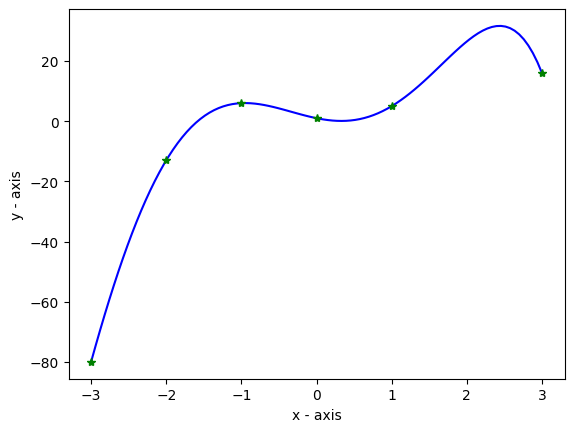

In [10]:
data_x = np.array([-3., -2., -1., 0., 1., 3.])
data_y = np.array([-80., -13., 6., 1., 5., 16.])
p = get_poly(data_x, data_y)
'''
np.linspace(a, b, n) returns a numpy array of n points equally
spaced from a to b
'''
x_arr = np.linspace(-3, 3, 100)
# interpolated values
y_interp = p(x_arr)

# pyplot is used for plotting
# Must read: [https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm]

plt.plot(x_arr, y_interp, 'b')
plt.plot(data_x, data_y, 'g*')
plt.xlabel('x - axis')
plt.ylabel('y - axis')

plt.show()

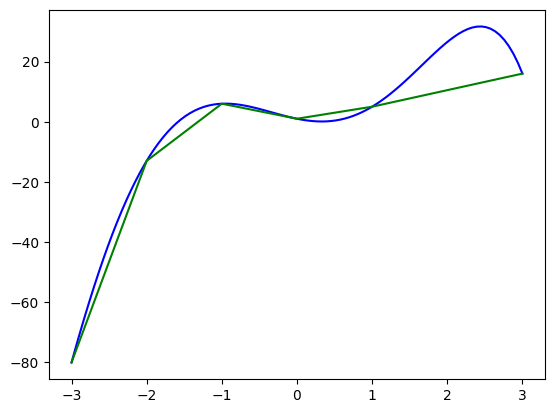

In [11]:
plt.plot(x_arr, y_interp, 'b')

plt.plot(data_x, data_y, 'g-')

<BarContainer object of 6 artists>

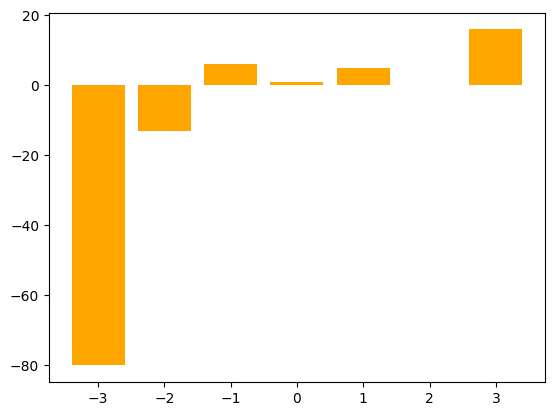

In [12]:
plt.bar(data_x, data_y, color='orange')


# Daily Evaluation - 4 Marks

In [13]:
x_arr= np.array([-1.2,0.8,1.9,-0.5,2.3])
y_arr=np.array([2.15,3.45,4.12,1.75,5.05])
a=get_poly(x_arr,y_arr)
x=6
z = a(np.array([x]))

[[ 1.     -1.2     1.44   -1.728   2.0736]
 [ 1.      0.8     0.64    0.512   0.4096]
 [ 1.      1.9     3.61    6.859  13.0321]
 [ 1.     -0.5     0.25   -0.125   0.0625]
 [ 1.      2.3     5.29   12.167  27.9841]]
